# LE-NET Deep Network - Traffic Sign Classification - CNN

## IMPORT LIBRARIES AND DATASET

In [1]:
%%time
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import pickle
%matplotlib inline

Wall time: 1.32 s


In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
# 34,799 images
# 32 * 32, 3 as color(red, blue, green)
X_train.shape

(34799, 32, 32, 3)

In [5]:
X_validation.shape

(4410, 32, 32, 3)

In [6]:
X_test.shape

(12630, 32, 32, 3)

## MAGE EXPLORATION

41

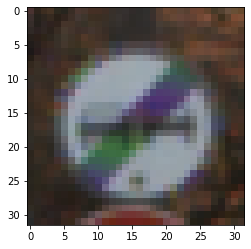

In [7]:
plt.imshow(X_train[77])
y_train[77]

41

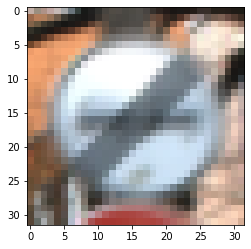

In [8]:
plt.imshow(X_train[88])
y_train[88]

## DATA PEPARATION

In [9]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)

###### transfer color into gray

###### normalize the images

<Figure size 432x288 with 0 Axes>

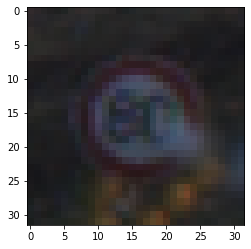

<Figure size 432x288 with 0 Axes>

In [10]:
plt.imshow(X_train[77])
plt.figure()
# plt.imshow(X_train_gray[77])
# plt.figure()
# plt.imshow(X_train_gray_norm[77])

### Categorize the label, y, since y is multi-class labels.

In [11]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y=y_train, num_classes=43)
y_cat_validation = to_categorical(y=y_validation, num_classes=43)
y_cat_test = to_categorical(y=y_test, num_classes=43)

### Feature scaling for X

In [12]:
X_train = X_train / 255
X_validation = X_validation / 255
X_test = X_test / 255

In [13]:
 X_train.shape

(34799, 32, 32, 3)

In [14]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

## Model Training (CNN)

In [15]:
%%time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout

model = Sequential()

# CONVOLUTIONAL LAYER (32, 32, 3)
model.add(layer=Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))

# POOLING LAYER
model.add(layer=MaxPooling2D(pool_size=(2, 2)))

# DORP OUT
model.add(layer=Dropout(0.3))

# FLATTEN IMAGES FROM 32 by 32 by 3 to 3072 BEFORE FINAL LAYER
model.add(layer=Flatten())

model.add(layer=Dense(units=512, activation="relu"))
model.add(layer=Dense(units=512, activation="relu"))
model.add(layer=Dense(units=512, activation="relu"))

# output layer Softmax -> Multi Class
# LAST LAYER IS THE CLASSIFIER, THUS 43 POSSIBLE CLASSES
model.add(layer=Dense(units=43, activation="softmax"))

Wall time: 106 ms


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2

In [17]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")

In [18]:
%%time
history = model.fit(X_train, y_cat_train, batch_size=32, epochs=10, verbose=1, validation_split=0.2,
                    shuffle=True,
                    validation_data=(X_validation, y_cat_validation) # using validation dataset to validate
                   );

Epoch 1/10
870/870 [==============================] - 29s 33ms/step - loss: 0.9390 - accuracy: 0.7193 - val_loss: 0.3116 - val_accuracy: 0.9102
Epoch 2/10
870/870 [==============================] - 28s 32ms/step - loss: 0.2204 - accuracy: 0.9336 - val_loss: 0.1344 - val_accuracy: 0.9629
Epoch 3/10
870/870 [==============================] - 29s 33ms/step - loss: 0.1315 - accuracy: 0.9604 - val_loss: 0.1191 - val_accuracy: 0.9662
Epoch 4/10
870/870 [==============================] - 29s 34ms/step - loss: 0.1011 - accuracy: 0.9705 - val_loss: 0.0982 - val_accuracy: 0.9741
Epoch 5/10
870/870 [==============================] - 30s 34ms/step - loss: 0.0756 - accuracy: 0.9770 - val_loss: 0.0903 - val_accuracy: 0.9763
Epoch 6/10
870/870 [==============================] - 29s 33ms/step - loss: 0.0817 - accuracy: 0.9760 - val_loss: 0.0880 - val_accuracy: 0.9786
Epoch 7/10
870/870 [==============================] - 29s 33ms/step - loss: 0.0568 - accuracy: 0.9838 - val_loss: 0.1253 - val_accuracy:

## Evaluate the Model 

In [19]:
model.evaluate(X_test, y_cat_test)

395/395 [==============================] - 3s 8ms/step - loss: 0.6654 - accuracy: 0.8919: 0s - loss: 0


[0.665367603302002, 0.8919239640235901]

In [20]:
pd.DataFrame(data=history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.939002,0.719315,0.311575,0.910201
1,0.220399,0.933618,0.134386,0.962931
2,0.131479,0.960379,0.119074,0.966236
3,0.101063,0.970545,0.098187,0.974138
4,0.075554,0.977011,0.090269,0.976293
5,0.081670,0.976041,0.088026,0.978592
6,0.056783,0.983764,0.125312,0.968534
7,0.062842,0.983261,0.097094,0.977443
8,0.053141,0.984805,0.085555,0.980172
9,0.043289,0.987679,0.085465,0.976868


In [21]:
%%time
predictions = model.predict_classes(X_test)
predictions

Wall time: 3.47 s


array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        60
           1       0.73      0.97      0.83       720
           2       0.97      0.84      0.90       750
           3       0.81      0.89      0.85       450
           4       0.85      0.91      0.88       660
           5       0.93      0.78      0.85       630
           6       1.00      0.81      0.90       150
           7       0.92      0.81      0.86       450
           8       0.82      0.91      0.86       450
           9       0.95      0.94      0.94       480
          10       0.98      0.92      0.95       660
          11       0.83      0.97      0.89       420
          12       0.98      0.93      0.96       690
          13       0.93      0.99      0.96       720
          14       0.97      1.00      0.98       270
          15       0.97      0.90      0.94       210
          16       0.99      0.97      0.98       150
          17       1.00    

Wall time: 1.01 s


<AxesSubplot:>

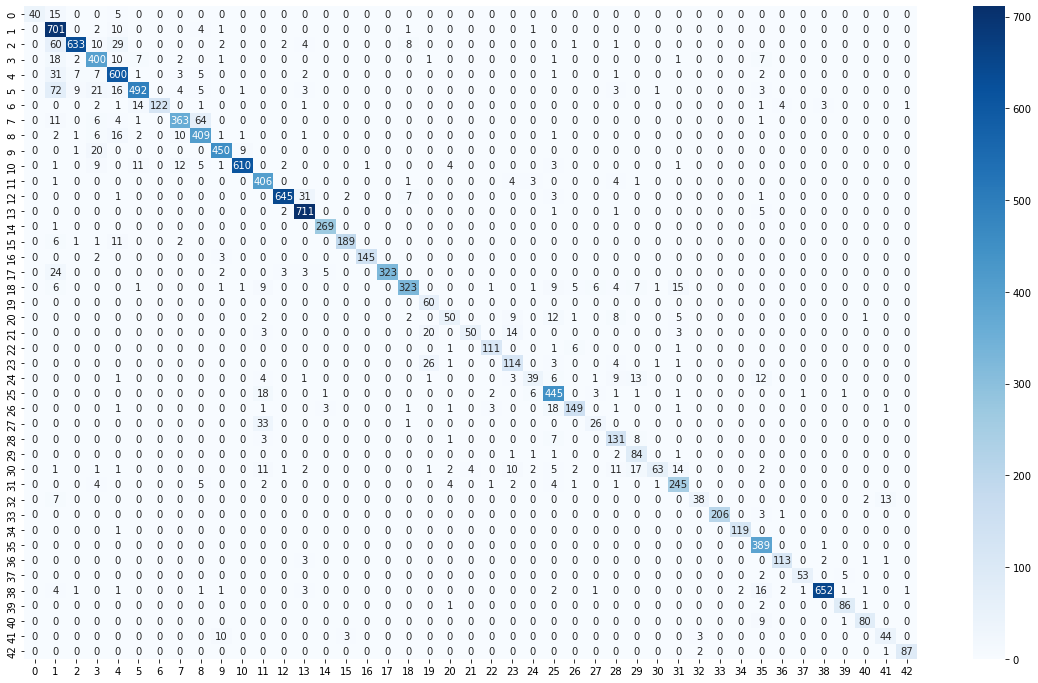

In [23]:
%%time
plt.figure(figsize=(20, 12))
sns.heatmap(data=confusion_matrix(y_true=y_test, y_pred=predictions), cmap="Blues", annot=True, fmt='.3g');

Wall time: 1.93 s


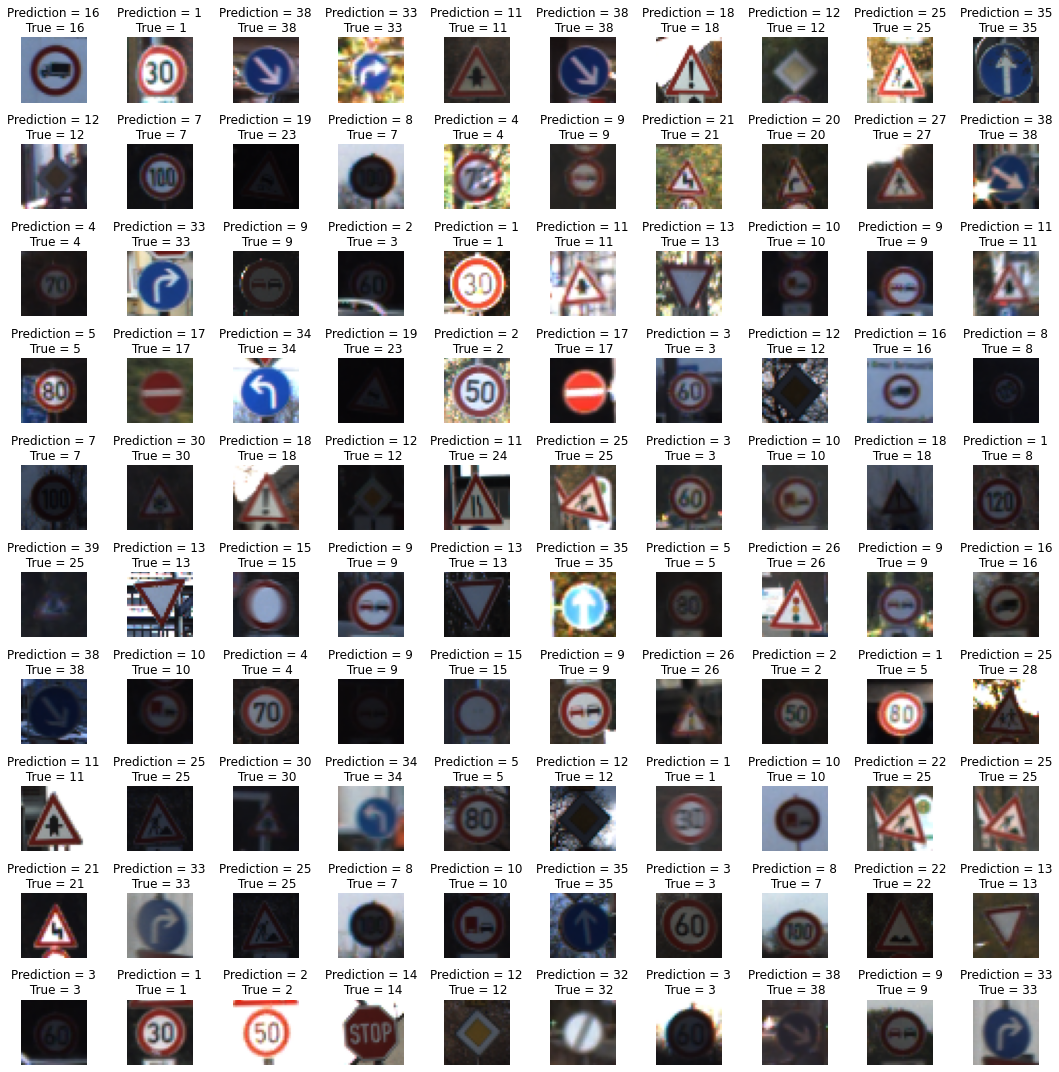

In [24]:
%%time
L = 10
W = 10
fig, axes = plt.subplots(L, W, figsize = (15, 15))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predictions[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)
plt.tight_layout();

## Model Save

In [25]:
model.save(filepath="cnn_traffic_sign.h5")

In [26]:
from tensorflow.keras.models import load_model

later_model = load_model(filepath="cnn_traffic_sign.h5")

In [27]:
later_model

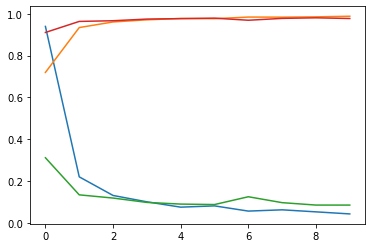

In [28]:
plt.plot(pd.DataFrame(data=history.history));